In [25]:
'''#run first time only
import os
import re
import shutil

directory_path = "G:/archive/images/images"
new_path = "E:/project/pet's breed _ image net/dataset"

pattern = r"^(.*?)_(\d+)\.\w+$"  
label_names = []

for filename in os.listdir(directory_path):
    match = re.match(pattern, filename)
    if match:
        breeds = match.group(1)
        numPic = match.group(2)
        if breeds not in label_names:
            label_names.append(breeds)
            os.makedirs(new_path+"/"+str(breeds))
            shutil.copy(directory_path+"/"+str(filename), new_path+"/"+str(breeds)+"/"+str(numPic)+".jpg")
        else :
            shutil.copy(directory_path+"/"+str(filename), new_path+"/"+str(breeds)+"/"+str(numPic)+".jpg")
print(label_names)'''

'#run first time only\nimport os\nimport re\nimport shutil\n\ndirectory_path = "G:/archive/images/images"\nnew_path = "E:/project/pet\'s breed _ image net/dataset"\n\npattern = r"^(.*?)_(\\d+)\\.\\w+$"  \nlabel_names = []\n\nfor filename in os.listdir(directory_path):\n    match = re.match(pattern, filename)\n    if match:\n        breeds = match.group(1)\n        numPic = match.group(2)\n        if breeds not in label_names:\n            label_names.append(breeds)\n            os.makedirs(new_path+"/"+str(breeds))\n            shutil.copy(directory_path+"/"+str(filename), new_path+"/"+str(breeds)+"/"+str(numPic)+".jpg")\n        else :\n            shutil.copy(directory_path+"/"+str(filename), new_path+"/"+str(breeds)+"/"+str(numPic)+".jpg")\nprint(label_names)'

In [26]:
label_names = ['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import os

In [28]:
path = "E:/project/pet's breed _ image net/dataset/american_bulldog/20.jpg"
label = tf.strings.split(path,"/")[-2]
label

<tf.Tensor: shape=(), dtype=string, numpy=b'american_bulldog'>

In [29]:
import glob
list_data_path = glob.glob("E:/project/pet's breed _ image net/dataset/*/*.jpg")
list_data_label = [x.split("\\")[-2] for x in list_data_path]
#look up table
lookup_table = tf.lookup.StaticHashTable(
    tf.lookup.KeyValueTensorInitializer(label_names, np.arange(len(label_names))),
    default_value=-1  # Default value if key is not found
)
print(lookup_table.lookup(tf.constant(["beagle"])))

tf.Tensor([4], shape=(1,), dtype=int32)


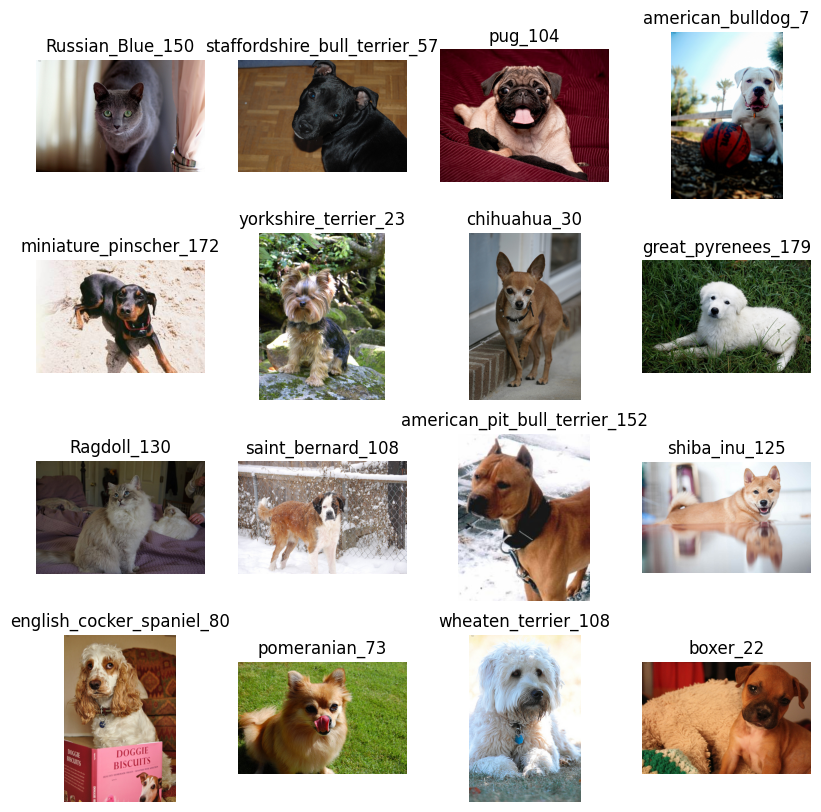

In [526]:
import os
import random
image_directory = "E:/project/pet's breed _ image net/dataset/"
all_numbers = list(range(0, 37))
selected_numbers = random.sample(all_numbers, 16)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    folder_path = image_directory+str(label_names[selected_numbers[i]])
    image_files = [file for file in os.listdir(folder_path)]
    selected_image_files = random.sample(image_files, 1)
    image = plt.imread(folder_path+"/"+selected_image_files[0])
    ax.imshow(image)
    ax.set_title(label_names[selected_numbers[i]]+'_'+selected_image_files[0][:-4])  # You can set the title if you want
    ax.axis('off')  # Turn off axis labels

In [31]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "E:/project/pet's breed _ image net/dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(120, 120),
  batch_size=16)
train_ds

Found 7387 files belonging to 37 classes.
Using 5910 files for training.


<_BatchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "E:/project/pet's breed _ image net/dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(120, 120),
  batch_size=32)

Found 7387 files belonging to 37 classes.
Using 1477 files for validation.


In [33]:
imagenet_model = tf.keras.applications.EfficientNetB0(
    input_shape= [120,120,3],
    include_top= False,
    weights= "imagenet"
)

In [34]:
model = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),
                             #tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                             #tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
                             #tf.keras.layers.Dropout(0.1),
                             imagenet_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             #tf.keras.layers.Dense(512, kernel_regularizer='l2'),
                             #tf.keras.layers.Dense(256),
                             #tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(len(label_names), kernel_regularizer='l2',activation = "sigmoid")
                             ])


In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)
imagenet_model.trainable = False
model.fit(
    train_ds,
    validation_data = val_ds,
    callbacks=[early_stopping],
    epochs = 20
    
)

Epoch 1/20
370/370 [==============================] - 198s 466ms/step - loss: 2.0089 - accuracy: 0.5547 - val_loss: 1.4191 - val_accuracy: 0.6764
Epoch 2/20
370/370 [==============================] - 174s 469ms/step - loss: 1.0609 - accuracy: 0.7540 - val_loss: 1.2719 - val_accuracy: 0.6838
Epoch 3/20
370/370 [==============================] - 170s 458ms/step - loss: 0.7693 - accuracy: 0.8193 - val_loss: 1.1253 - val_accuracy: 0.7089
Epoch 4/20
370/370 [==============================] - 174s 470ms/step - loss: 0.6262 - accuracy: 0.8640 - val_loss: 1.3377 - val_accuracy: 0.6892
Epoch 5/20
370/370 [==============================] - 169s 455ms/step - loss: 0.5743 - accuracy: 0.8755 - val_loss: 1.2765 - val_accuracy: 0.7095
Epoch 6/20
370/370 [==============================] - 164s 442ms/step - loss: 0.5205 - accuracy: 0.8929 - val_loss: 1.2074 - val_accuracy: 0.7292


In [37]:
model.trainable = False
for i,layer in enumerate(imagenet_model.layers[-1:-2:-1]):
    print(-i-1)   
    layer.trainable = True
    model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-7),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"])
    model.fit(
        train_ds,
        validation_data = val_ds,
        callbacks=[early_stopping],
        epochs = 3)
    

-1
Epoch 1/3
370/370 [==============================] - 55s 138ms/step - loss: 0.5126 - accuracy: 0.8961 - val_loss: 1.1253 - val_accuracy: 0.7089
Epoch 2/3
370/370 [==============================] - 50s 134ms/step - loss: 0.5180 - accuracy: 0.8963 - val_loss: 1.1253 - val_accuracy: 0.7089
Epoch 3/3
370/370 [==============================] - 50s 134ms/step - loss: 0.5199 - accuracy: 0.8939 - val_loss: 1.1253 - val_accuracy: 0.7089


In [38]:
model.trainable = True
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
imagenet_model.trainable = False
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"])
history = model.fit(
    train_ds,
    validation_data = val_ds,
    callbacks=[early_stopping],
    shuffle=True,
    epochs = 20
)

Epoch 1/20
370/370 [==============================] - 56s 139ms/step - loss: 0.4991 - accuracy: 0.8988 - val_loss: 1.0807 - val_accuracy: 0.7271
Epoch 2/20
370/370 [==============================] - 50s 135ms/step - loss: 0.4706 - accuracy: 0.9088 - val_loss: 1.0464 - val_accuracy: 0.7312
Epoch 3/20
370/370 [==============================] - 50s 135ms/step - loss: 0.4531 - accuracy: 0.9171 - val_loss: 1.0206 - val_accuracy: 0.7387
Epoch 4/20
370/370 [==============================] - 50s 136ms/step - loss: 0.4300 - accuracy: 0.9212 - val_loss: 1.0002 - val_accuracy: 0.7414
Epoch 5/20
370/370 [==============================] - 50s 135ms/step - loss: 0.4222 - accuracy: 0.9254 - val_loss: 0.9830 - val_accuracy: 0.7448
Epoch 6/20
370/370 [==============================] - 50s 136ms/step - loss: 0.4129 - accuracy: 0.9311 - val_loss: 0.9687 - val_accuracy: 0.7495
Epoch 7/20
370/370 [==============================] - 50s 135ms/step - loss: 0.4038 - accuracy: 0.9328 - val_loss: 0.9571 - val_ac

In [39]:
import numpy as np
import matplotlib.pyplot as plt

class HistoryGraph:
    def __init__(self, history, epochs, title):
        self.history = history
        self.epochs = epochs
        self.title = title
    def draw(self):
        figure, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
        figure.suptitle(self.title, fontsize=12)
        figure.subplots_adjust(top=0.85, wspace=0.3)
        
        epoch_list = list(range(1, self.epochs + 1))
        ax1.plot(epoch_list,
                self.history.history['accuracy'],
                label='Train Accuracy')
        ax1.plot(epoch_list,
                self.history.history['val_accuracy'],
                label='Validation Accuracy')
        ax1.set_xticks(np.arange(0, self.epochs + 1, 5))
        ax1.set_ylabel('Accuracy Value')
        ax1.set_xlabel('Epoch*')
        ax1.set_title('Accuracy')
        ax1.legend(loc="best")
        
        ax2.plot(epoch_list, self.history.history['loss'], label='Train Loss')
        ax2.plot(epoch_list,
                 self.history.history['val_loss'],
                 label='Validation Loss')
        
        ax2.set_xticks(np.arange(0, self.epochs + 1, 5))
        ax2.set_ylabel('loss Value')
        ax2.set_xlabel('Epoch')
        ax2.set_title('Loss')
        ax2.legend(loc="best")
        plt.close

In [40]:
model.trainable = True
checkpoint_filepath = "E:/project/pet's breed _ image net/check point"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(
    optimizer = tf.keras.optimizers.Adam(1e-7),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)
model.save_weights(checkpoint_filepath.format(epoch=0))
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 80,
    callbacks=[model_checkpoint_callback])
    

Epoch 1/80
370/370 [==============================] - 180s 455ms/step - loss: 0.5142 - accuracy: 0.8997 - val_loss: 0.8683 - val_accuracy: 0.7833
Epoch 2/80
370/370 [==============================] - 176s 476ms/step - loss: 0.5213 - accuracy: 0.8964 - val_loss: 0.8668 - val_accuracy: 0.7847
Epoch 3/80
370/370 [==============================] - 175s 473ms/step - loss: 0.5159 - accuracy: 0.9003 - val_loss: 0.8658 - val_accuracy: 0.7813
Epoch 4/80
370/370 [==============================] - 175s 472ms/step - loss: 0.5064 - accuracy: 0.8992 - val_loss: 0.8661 - val_accuracy: 0.7827
Epoch 5/80
370/370 [==============================] - 176s 476ms/step - loss: 0.5050 - accuracy: 0.9020 - val_loss: 0.8632 - val_accuracy: 0.7813
Epoch 6/80
370/370 [==============================] - 174s 470ms/step - loss: 0.5152 - accuracy: 0.8963 - val_loss: 0.8644 - val_accuracy: 0.7800
Epoch 7/80
370/370 [==============================] - 174s 471ms/step - loss: 0.5023 - accuracy: 0.9064 - val_loss: 0.8620 -

In [539]:
model.save_weights("E:/project/pet's breed _ image net/check point/")

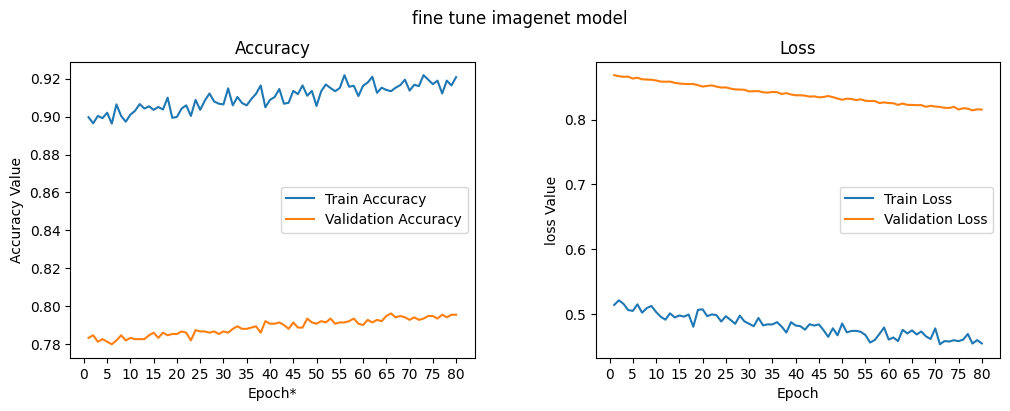

In [41]:
HistoryGraph(history, 80, "fine tune imagenet model").draw()

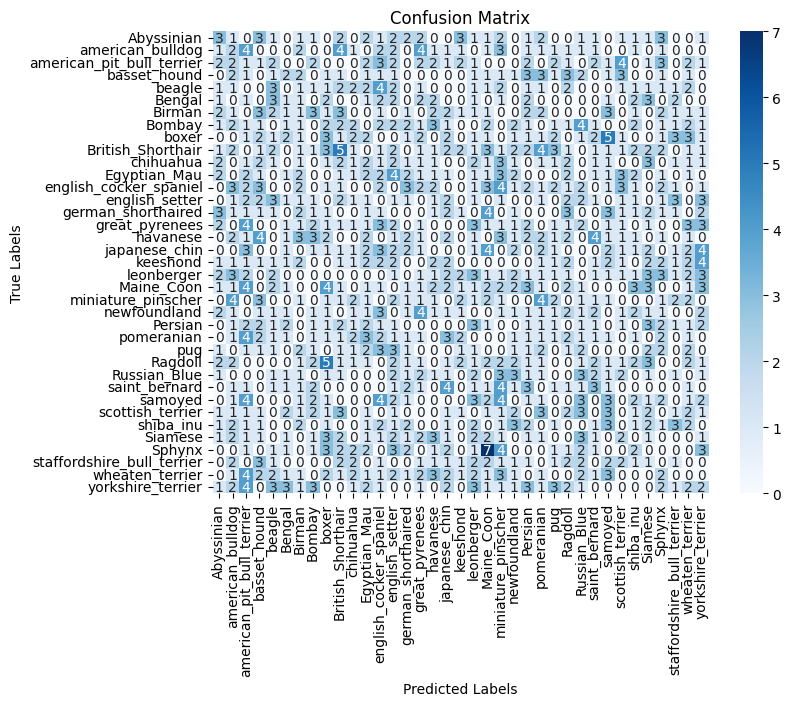

In [47]:
import seaborn as sns
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_class).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [537]:
y_true = []
val_data = []
for batch_images, batch_labels in val_ds:
    y_true.extend(batch_labels.numpy())
    val_data.append(batch_images.numpy())
y_true = np.array(y_true)
print(y_true)

list_val = []
for i in range(len(val_data)):
    list_val.extend(val_data[i])
list_val = np.array(list_val)
predictions = model.predict(list_val)
predicted_labels = tf.argmax(predictions, axis=1)
print(predicted_labels)

[ 5  2  9 ... 19 36 16]
47/47 [==============================] - 12s 246ms/step
tf.Tensor([ 5  2  3 ... 19 36 13], shape=(1477,), dtype=int64)


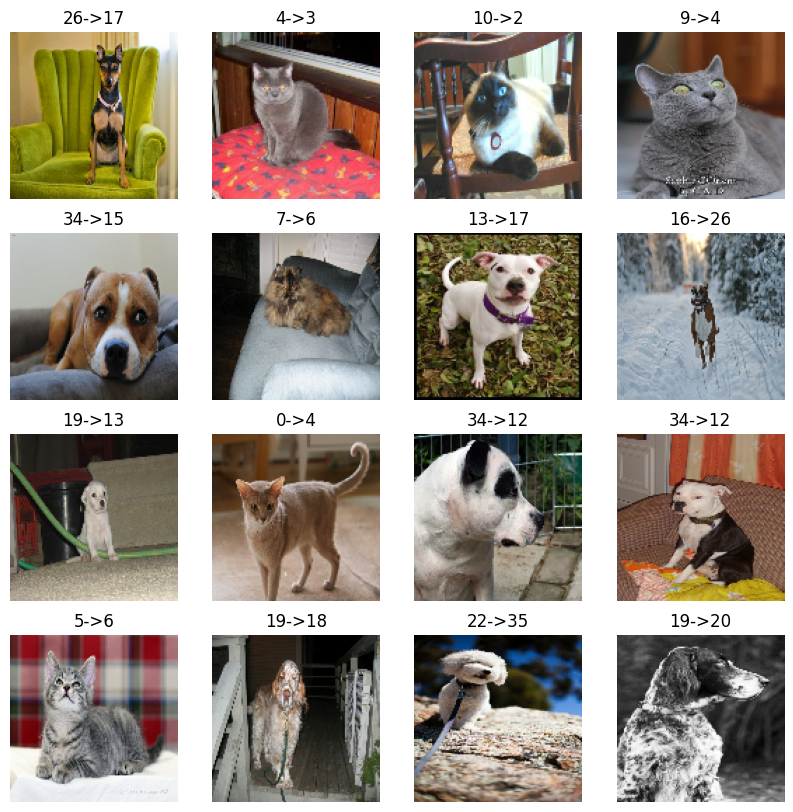

In [538]:
logic_array = predicted_labels.numpy() == y_true
lofalse_indices = np.where(logic_array == False)[0]
ramdom_errorNO = random.sample(list(lofalse_indices), 16)
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    n = ramdom_errorNO[i]
    ax.imshow(list_val[n]/255)
    ax.set_title(str(y_true[n])+"->"+ str(int(predicted_labels[n])))  # You can set the title if you want
    ax.axis('off')  # Turn off axis labels
